# Prototyping a Data Filtering Pipeline
## Prerequisites

In [1]:
import glob
import pandas as pd
import mmproteo
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-jtx7adk1 because the default path (/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)

## Data Import

In [3]:
pwd

'/tf/workspace/notebooks'

In [4]:
PROJECT = "PXD010000"
DATA_PATH = f"../datasets/{PROJECT}"
DUMP_PATH = f"../dumps/{PROJECT}"
TRAINING_COLUMNS_DUMP_PATH = DUMP_PATH + "/training_columns"
MZMLID_FILES_PATH = f"{DATA_PATH}/*_mzmlid.parquet"

In [5]:
mmproteo.utils.utils.ensure_dir_exists(TRAINING_COLUMNS_DUMP_PATH)

In [6]:
MZMLID_FILE_PATHS = glob.glob(MZMLID_FILES_PATH)
MZMLID_FILE_PATHS

['../datasets/PXD010000/Biodiversity_B_fragilis_01_28Jul15_Arwen_14-12-03_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_B_thet_CMgluc_anaerobic_01_01Feb16_Arwen_15-07-13_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_M_smegmatis_BHI_aerobic_3_05Oct16_Pippin_16-05-06_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_B_fragilis_LIB_anaerobic_03_01Feb16_Arwen_15-07-13_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_Lactobacillus_casei_MRS_01_27Dec15_Arwen_15-07-13_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_P_ruminicola_MDM_anaerobic_2_09Jun16_Pippin_16-03-39_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_S_agalactiae_LIB_aerobic_01_26Feb16_Arwen_16-01-01_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_S_thermosulf_FeYE_anaerobic_1_01Jun16_Pippin_16-03-39_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_A_cryptum_FeTSB_anaerobic_1_01Jun16_Pippin_16-03-39_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_M_xanthus_DZ2_48h_plates_1_13

In [7]:
ls ../datasets/PXD010000/Biodiversity_M_smegmatis_BHI_aerobic_3_05Oct16_Pippin_16-05-06*

../datasets/PXD010000/Biodiversity_M_smegmatis_BHI_aerobic_3_05Oct16_Pippin_16-05-06.mzML
../datasets/PXD010000/Biodiversity_M_smegmatis_BHI_aerobic_3_05Oct16_Pippin_16-05-06_msgfplus.mzid
../datasets/PXD010000/Biodiversity_M_smegmatis_BHI_aerobic_3_05Oct16_Pippin_16-05-06_mzmlid.parquet


In [8]:
MZMLID_FILE_PATHS

['../datasets/PXD010000/Biodiversity_B_fragilis_01_28Jul15_Arwen_14-12-03_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_B_thet_CMgluc_anaerobic_01_01Feb16_Arwen_15-07-13_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_M_smegmatis_BHI_aerobic_3_05Oct16_Pippin_16-05-06_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_B_fragilis_LIB_anaerobic_03_01Feb16_Arwen_15-07-13_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_Lactobacillus_casei_MRS_01_27Dec15_Arwen_15-07-13_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_P_ruminicola_MDM_anaerobic_2_09Jun16_Pippin_16-03-39_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_S_agalactiae_LIB_aerobic_01_26Feb16_Arwen_16-01-01_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_S_thermosulf_FeYE_anaerobic_1_01Jun16_Pippin_16-03-39_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_A_cryptum_FeTSB_anaerobic_1_01Jun16_Pippin_16-03-39_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_M_xanthus_DZ2_48h_plates_1_13

In [9]:
len(MZMLID_FILE_PATHS)

235

In [10]:
# for testing
MZMLID_FILE_PATHS = MZMLID_FILE_PATHS[:1]

In [11]:
current_input_file_path = MZMLID_FILE_PATHS[0]

In [12]:
df = pd.read_parquet(current_input_file_path)

## Data Description

In [13]:
df.drop(columns=['mz_array', 'intensity_array']).head()

,index,id,defaultArrayLength,MS1_spectrum,ms_level,positive_scan,centroid_spectrum,base_peak_mz,base_peak_intensity,total_ion_current,lowest_observed_mz,highest_observed_mz,count,scanList__no_combination,scanList__scan__scan_start_time,scanList__scan__filter_string,scanList__scan__preset_scan_configuration,scanList__scan__ion_injection_time,scanList__scan__scanWindowList__scanWindow__scan_window_lower_limit,scanList__scan__scanWindowList__scanWindow__scan_window_upper_limit,MSn_spectrum,scanList__scan__Thermo_Trailer_ExtraMonoisotopic_MZ,precursorList__precursor__spectrumRef,precursorList__precursor__isolationWindow__isolation_window_target_mz,precursorList__precursor__isolationWindow__isolation_window_lower_offset,precursorList__precursor__isolationWindow__isolation_window_upper_offset,precursorList__precursor__activation__beamtype_collisioninduced_dissociation,precursorList__precursor__activation__collision_energy,precursorList__precursor__selectedIonList__selectedIon__selected_ion_mz,precursorList__precursor__selectedIonList__selectedIon__charge_state,precursorList__precursor__selectedIonList__selectedIon__peak_intensity,mzml_filename,spectrumID,scan_numbers,location,name,FileFormat,SpectrumIDFormat,SpectrumIdentificationItem__1__passThreshold,SpectrumIdentificationItem__1__rank,SpectrumIdentificationItem__1__calculatedMassToCharge,SpectrumIdentificationItem__1__experimentalMassToCharge,SpectrumIdentificationItem__1__chargeState,SpectrumIdentificationItem__1__MSGFRawScore,SpectrumIdentificationItem__1__MSGFDeNovoScore,SpectrumIdentificationItem__1__MSGFSpecEValue,SpectrumIdentificationItem__1__MSGFEValue,SpectrumIdentificationItem__1__MSGFQValue,SpectrumIdentificationItem__1__MSGFPepQValue,SpectrumIdentificationItem__1__IsotopeError,SpectrumIdentificationItem__1__AssumedDissociationMethod,SpectrumIdentificationItem__1__ExplainedIonCurrentRatio,SpectrumIdentificationItem__1__NTermIonCurrentRatio,SpectrumIdentificationItem__1__CTermIonCurrentRatio,SpectrumIdentificationItem__1__MS2IonCurrent,SpectrumIdentificationItem__1__NumMatchedMainIons,SpectrumIdentificationItem__1__MeanErrorAll,SpectrumIdentificationItem__1__StdevErrorAll,SpectrumIdentificationItem__1__MeanErrorTop7,SpectrumIdentificationItem__1__StdevErrorTop7,SpectrumIdentificationItem__1__MeanRelErrorAll,SpectrumIdentificationItem__1__StdevRelErrorAll,SpectrumIdentificationItem__1__MeanRelErrorTop7,SpectrumIdentificationItem__1__StdevRelErrorTop7,SpectrumIdentificationItem__1__PeptideSequence,SpectrumIdentificationItem__1__PeptideEvidenceRef__isDecoy,SpectrumIdentificationItem__1__PeptideEvidenceRef__post,SpectrumIdentificationItem__1__PeptideEvidenceRef__pre,SpectrumIdentificationItem__1__PeptideEvidenceRef__end,SpectrumIdentificationItem__1__PeptideEvidenceRef__start,SpectrumIdentificationItem__1__PeptideEvidenceRef__PeptideSequence,SpectrumIdentificationItem__1__PeptideEvidenceRef__accession,SpectrumIdentificationItem__1__PeptideEvidenceRef__length,SpectrumIdentificationItem__1__PeptideEvidenceRef__protein_description,SpectrumIdentificationItem__1__PeptideEvidenceRef__numDatabaseSequences,SpectrumIdentificationItem__1__PeptideEvidenceRef__DB_composition_targetdecoy,SpectrumIdentificationItem__1__PeptideEvidenceRef__decoy_DB_accession_regexp,SpectrumIdentificationItem__1__PeptideEvidenceRef__decoy_DB_type_reverse,SpectrumIdentificationItem__1__PeptideEvidenceRef__DatabaseName__ID_005334_236ED22Cfasta,SpectrumIdentificationItem__1__Modification__monoisotopicMassDelta,SpectrumIdentificationItem__1__PeptideEvidenceRef__Modification__monoisotopicMassDelta,SpectrumIdentificationItem__1__Modification,SpectrumIdentificationItem__1__PeptideEvidenceRef__Modification,SpectrumIdentificationItem__2__passThreshold,SpectrumIdentificationItem__2__rank,SpectrumIdentificationItem__2__calculatedMassToCharge,SpectrumIdentificationItem__2__experimentalMassToCharge,SpectrumIdentificationItem__2__chargeState,SpectrumIdentificationItem__2__MSGFRawScore,SpectrumIdentificationItem__2__MSGF

In [14]:
df.dtypes

index                                                                                         int64
id                                                                                           object
defaultArrayLength                                                                            int64
MS1_spectrum                                                                                 object
ms_level                                                                                      int64
positive_scan                                                                                object
centroid_spectrum                                                                            object
base_peak_mz                                                                                float64
base_peak_intensity                                                                         float64
total_ion_current                                                                           float64


In [15]:
df.describe()

,index,defaultArrayLength,ms_level,base_peak_mz,base_peak_intensity,total_ion_current,lowest_observed_mz,highest_observed_mz,count,scanList__scan__scan_start_time,scanList__scan__preset_scan_configuration,scanList__scan__ion_injection_time,scanList__scan__scanWindowList__scanWindow__scan_window_lower_limit,scanList__scan__scanWindowList__scanWindow__scan_window_upper_limit,scanList__scan__Thermo_Trailer_ExtraMonoisotopic_MZ,precursorList__precursor__isolationWindow__isolation_window_target_mz,precursorList__precursor__isolationWindow__isolation_window_lower_offset,precursorList__precursor__isolationWindow__isolation_window_upper_offset,precursorList__precursor__activation__collision_energy,precursorList__precursor__selectedIonList__selectedIon__selected_ion_mz,precursorList__precursor__selectedIonList__selectedIon__charge_state,precursorList__precursor__selectedIonList__selectedIon__peak_intensity,scan_numbers,SpectrumIdentificationItem__1__rank,SpectrumIdentificationItem__1__calculatedMassToCharge,SpectrumIdentificationItem__1__experimentalMassToCharge,SpectrumIdentificationItem__1__chargeState,SpectrumIdentificationItem__1__MSGFRawScore,SpectrumIdentificationItem__1__MSGFDeNovoScore,SpectrumIdentificationItem__1__MSGFSpecEValue,SpectrumIdentificationItem__1__MSGFEValue,SpectrumIdentificationItem__1__MSGFQValue,SpectrumIdentificationItem__1__MSGFPepQValue,SpectrumIdentificationItem__1__IsotopeError,SpectrumIdentificationItem__1__ExplainedIonCurrentRatio,SpectrumIdentificationItem__1__NTermIonCurrentRatio,SpectrumIdentificationItem__1__CTermIonCurrentRatio,SpectrumIdentificationItem__1__MS2IonCurrent,SpectrumIdentificationItem__1__NumMatchedMainIons,SpectrumIdentificationItem__1__MeanErrorAll,SpectrumIdentificationItem__1__StdevErrorAll,SpectrumIdentificationItem__1__MeanErrorTop7,SpectrumIdentificationItem__1__StdevErrorTop7,SpectrumIdentificationItem__1__MeanRelErrorAll,SpectrumIdentificationItem__1__StdevRelErrorAll,SpectrumIdentificationItem__1__MeanRelErrorTop7,SpectrumIdentificationItem__1__StdevRelErrorTop7,SpectrumIdentificationItem__1__PeptideEvidenceRef__end,SpectrumIdentificationItem__1__PeptideEvidenceRef__start,SpectrumIdentificationItem__1__PeptideEvidenceRef__length,SpectrumIdentificationItem__1__PeptideEvidenceRef__numDatabaseSequences,SpectrumIdentificationItem__1__Modification__monoisotopicMassDelta,SpectrumIdentificationItem__1__PeptideEvidenceRef__Modification__monoisotopicMassDelta,SpectrumIdentificationItem__2__rank,SpectrumIdentificationItem__2__calculatedMassToCharge,SpectrumIdentificationItem__2__experimentalMassToCharge,SpectrumIdentificationItem__2__chargeState,SpectrumIdentificationItem__2__MSGFRawScore,SpectrumIdentificationItem__2__MSGFDeNovoScore,SpectrumIdentificationItem__2__MSGFSpecEValue,SpectrumIdentificationItem__2__MSGFEValue,SpectrumIdentificationItem__2__MSGFQValue,SpectrumIdentificationItem__2__MSGFPepQValue,SpectrumIdentificationItem__2__IsotopeError,SpectrumIdentificationItem__2__ExplainedIonCurrentRatio,SpectrumIdentificationItem__2__NTermIonCurrentRatio,SpectrumIdentificationItem__2__CTermIonCurrentRatio,SpectrumIdentificationItem__2__MS2IonCurrent,SpectrumIdentificationItem__2__NumMatchedMainIons,SpectrumIdentificationItem__2__MeanErrorAll,SpectrumIdentificationItem__2__StdevErrorAll,SpectrumIdentificationItem__2__MeanErrorTop7,SpectrumIdentificationItem__2__StdevErrorTop7,SpectrumIdentificationItem__2__MeanRelErrorAll,SpectrumIdentificationItem__2__StdevRelErrorAll,SpectrumIdentificationItem__2__MeanRelErrorTop7,SpectrumIdentificationItem__2__StdevRelErrorTop7,SpectrumIdentificationItem__2__PeptideEvidenceRef__end,SpectrumIdentificationItem__2__PeptideEvidenceRef__start,SpectrumIdentificationItem__2__PeptideEvidenceRef__length,SpectrumIdentificationItem__2__PeptideEvidenceRef__numDatabaseSequences,SpectrumIdentificationItem__2__Modification__monoisotopicMassDelta,SpectrumIdentificationItem__2__PeptideEvidenceRef__Modification__monoisotopicMassDelta,SpectrumIdentificationItem__3__r

In [16]:
IS_DECOY = 'SpectrumIdentificationItem__1__PeptideEvidenceRef__isDecoy'
RAW_SCORE = 'SpectrumIdentificationItem__1__MSGFRawScore'

### Weird Findings: There are NA values in the first isDecoy column

In [17]:
df[[RAW_SCORE, IS_DECOY]].head(2)

,SpectrumIdentificationItem__1__MSGFRawScore,SpectrumIdentificationItem__1__PeptideEvidenceRef__isDecoy
0,79.0,False
1,7.0,True


In [18]:
df[IS_DECOY].dropna().value_counts() == df[IS_DECOY].value_counts()

False    True
True     True
Name: SpectrumIdentificationItem__1__PeptideEvidenceRef__isDecoy, dtype: bool

In [19]:
df[IS_DECOY].fillna(value=-1).value_counts()

False    34602
True      6779
-1         217
Name: SpectrumIdentificationItem__1__PeptideEvidenceRef__isDecoy, dtype: int64

In [20]:
df[IS_DECOY].value_counts()

False    34602
True      6779
Name: SpectrumIdentificationItem__1__PeptideEvidenceRef__isDecoy, dtype: int64

## Data Filtering

### Drop NA Decoys

In [21]:
df = df.dropna(subset=[IS_DECOY])

### FDR Decoy Cutoff

In [22]:
def plot_values_by_class(df, value_col=RAW_SCORE, class_col=IS_DECOY):
    df.pivot(columns=class_col, values=value_col).plot.hist(bins=100, alpha=0.5)
    plt.xlabel(value_col)
    plt.show()

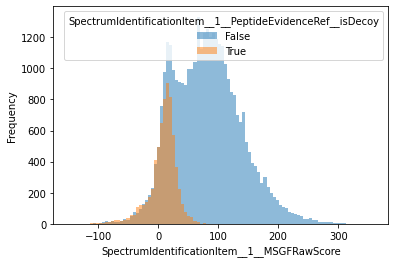

In [23]:
plot_values_by_class(df)

In [24]:
# poor mens' FDR

# TODO find a way to directly achieve a specific FDR
def cutoff_decoys(df, decoy_ratio_to_keep=0.04, is_decoy_col=IS_DECOY, score_col=RAW_SCORE):
    decoys = df[df[is_decoy_col] == True]
    decoy_count = len(decoys)
    print(f"Number of Decoys: {decoy_count}")

    decoy_count_to_filter_out = decoy_count * (1-decoy_ratio_to_keep)
    decoy_count_to_filter_out = round(decoy_count_to_filter_out)
    print(f"Number of Decoys to definitely remove: {decoy_count_to_filter_out}")

    decoys_to_remove = decoys.sort_values(score_col, ascending=True).head(decoy_count_to_filter_out)
    lower_limit_score = decoys_to_remove[score_col].max()
    print(f"Lower score limit for keeping values: {lower_limit_score}")

    length_before_score_filtering = len(df)
    df = df[df[score_col] > lower_limit_score]
    length_after_score_filtering = len(df)
    print(f"Number of removed entries: {length_before_score_filtering - length_after_score_filtering}")

    fdr = df[is_decoy_col].value_counts()[True] / length_after_score_filtering
    print(f"False discovery rate (FDR): {fdr}")
    return df

In [25]:
df = cutoff_decoys(df)

Number of Decoys: 6779
Number of Decoys to definitely remove: 6508
Lower score limit for keeping values: 40.0
Number of removed entries: 15807
False discovery rate (FDR): 0.010518495346836632


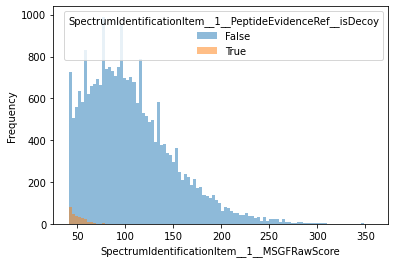

In [26]:
plot_values_by_class(df)

In [27]:
# filter out Decoys
df = df[~df['SpectrumIdentificationItem__1__PeptideEvidenceRef__isDecoy'].astype(bool)]

In [28]:
len(df)

25305

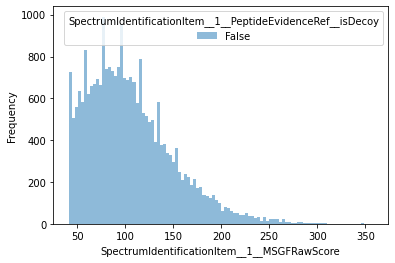

In [29]:
plot_values_by_class(df)

# Data Limiting

In [30]:
TRAINING_COLUMNS = [
    'SpectrumIdentificationItem__1__PeptideEvidenceRef__PeptideSequence',
    'mz_array',
    'intensity_array',
]

In [31]:
reduced_df = df[TRAINING_COLUMNS]
reduced_df.head(1)

,SpectrumIdentificationItem__1__PeptideEvidenceRef__PeptideSequence,mz_array,intensity_array
0,TTTPKKPNSAMR,"[100.07641, 100.087074, 101.07137, 101.1077, 102.05501, 110.07133, 110.631386, 112.05055, 112.07596, 112.08711, 113.07111, 115.05069, 115.08657, 116.07058, 127.0866, 129.10239, 130.08636, 130.09476, 130.10594, 131.0815, 131.09012, 132.54994, 136.06177, 136.07571, 139.08629, 139.90489, 140.0708, 141.06584, 141.10217, 143.08157, 145.0981, 147.11227, 147.96593, 149.02304, 152.05658, 153.10185, 155.08127, 155.11765, 157.09727, 157.10991, 158.09113, 159.07635, 164.05647, 167.05591, 167.08096, 169.05196, 171.07687, 171.11266, 175.10767, 175.11974, 176.11064, 180.07697, 181.09694, 181.13272, 185.05566, 185.09209, 186.09564, 196.10736, 197.09218, 198.08804, 199.0704, 199.10811, 203.10245, 204.10599, 205.1368, 209.1289, 212.10365, 214.11859, 222.16032, 224.10338, 226.15494, 227.1583, 238.15607, 240.13449, 240.17038, 242.11392, 257.19702, 258.15533, 258.20068, 264.13522, 265.1653, 268.12894, 283.17685, 286.13928, 300.11865, 305.15933, 305.65024, 309.192, 312.04562, 314.16446, 321.8492, 327.2031, 327.5248, 327.8595, 329.19373, 336.19986, 337.64832, 343.18893, 346.16183, 346.5337, ...]","[1044.7223, 3649.1797, 1102.0496, 1357.6985, 844.1217, 4310.1567, 701.75555, 3388.4607, 14474.438, 3396.4175, 3271.5308, 785.9828, 3989.8667, 1080.443, 8620.463, 115111.52, 60642.484, 892.7931, 6232.6123, 1503.7406, 1695.8452, 621.4343, 8136.3633, 3622.0579, 3527.2075, 690.5978, 3141.1062, 9701.572, 1072.0393, 4542.582, 913.5738, 1275.7793, 904.80707, 1183.5809, 1307.1254, 3257.456, 6890.353, 782.2476, 22261.06, 948.4679, 1374.1157, 8412.553, 1015.7166, 942.1996, 4452.6733, 818.5687, 7237.765, 11416.154, 45089.855, 7394.4355, 1465.4384, 3969.8708, 1652.0625, 1171.807, 927.53595, 48796.72, 3459.731, 1612.3837, 884.8939, 1009.1056, 948.3301, 5930.4526, 20944.246, 1297.6293, 876.90686, 699.8927, 2823.239, 4986.422, 1002.72095, 6868.054, 48777.496, 5358.242, 1159.44, 6050.066, 1177.8954, 4301.8447, 13318.132, 1678.9065, 896.4516, 1518.1096, 1104.4894, 3720.5735, 1503.6326, 7302.4346, 1507.2914, 853.93396, 1312.6992, 4806.0015, 1169.0146, 3889.657, 1483.5475, 3854.5623, 6731.8696, 3342.8206, 5410.943, 1120.8875, 888.22064, 883.156, 4437.399, 1748.3259, ...]"


## Data Dumping

In [32]:
current_output_file_path = TRAINING_COLUMNS_DUMP_PATH + current_input_file_path[len(DATA_PATH):]
current_output_file_path

'../dumps/PXD010000/training_columns/Biodiversity_B_fragilis_01_28Jul15_Arwen_14-12-03_mzmlid.parquet'

In [33]:
df.to_parquet(current_output_file_path)